# HW 03 Бондаренко Алексей bondaleksey@gmail.com

In [1]:
import pickle
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

import umap

# 1 Разведывательный анализ данных

В работе используются известный датасет [обнаружение мошенничества с кредитными картами](https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv) размещенный на Kaggle. Чтобы не плодить лишние сущности папка data включена в файл gitignore.  

In [2]:
data = pd.read_csv('data-an/archive.zip', compression='zip', header=0, sep=',', quotechar='"',index_col=0)

Для удобства работы с данными будем исследовать десятую часть всего набора данных. 

In [3]:
X_short, X_long = train_test_split(data, train_size=0.1, random_state=4032)
data = pd.concat([X_short[X_short['Class']==0],data[data['Class']==1]])

In [4]:
data = data.reset_index(drop=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-3.932890,-4.454185,0.560636,-0.246845,7.110710,0.592440,-2.595720,1.100108,0.109246,-0.288397,...,0.193459,-0.788052,0.545164,1.016355,0.943910,0.270880,-0.357307,-0.083948,40.00,0
1,-4.454481,3.417883,-0.944076,3.266562,-1.079084,0.206809,-1.236181,2.452580,-2.325881,0.159886,...,0.359695,0.389577,0.139491,1.114212,0.960465,0.147911,-2.063250,-0.688977,23.66,0
2,2.050060,-0.057366,-1.066152,0.409448,-0.105081,-1.126021,0.179396,-0.315409,0.524361,0.060982,...,-0.281132,-0.668061,0.344143,-0.010339,-0.310655,0.200530,-0.067231,-0.059967,3.58,0
3,-1.843151,1.695720,0.848633,-0.850290,-0.710714,-0.857539,0.156494,0.637991,0.549483,0.559508,...,-0.220738,-0.451400,0.037456,0.495634,-0.098068,0.288296,0.581959,0.351278,1.00,0
4,1.699861,-0.655470,-0.468761,1.256478,-0.611978,-0.039863,-0.492656,0.131595,0.822350,0.370122,...,0.316964,0.704783,-0.008739,-0.375659,-0.159184,-0.570721,0.022318,-0.024162,129.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28925 entries, 0 to 28924
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28925 non-null  float64
 1   V2      28925 non-null  float64
 2   V3      28925 non-null  float64
 3   V4      28925 non-null  float64
 4   V5      28925 non-null  float64
 5   V6      28925 non-null  float64
 6   V7      28925 non-null  float64
 7   V8      28925 non-null  float64
 8   V9      28925 non-null  float64
 9   V10     28925 non-null  float64
 10  V11     28925 non-null  float64
 11  V12     28925 non-null  float64
 12  V13     28925 non-null  float64
 13  V14     28925 non-null  float64
 14  V15     28925 non-null  float64
 15  V16     28925 non-null  float64
 16  V17     28925 non-null  float64
 17  V18     28925 non-null  float64
 18  V19     28925 non-null  float64
 19  V20     28925 non-null  float64
 20  V21     28925 non-null  float64
 21  V22     28925 non-null  float64
 22

In [6]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,...,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000,28925.000000
mean,-0.069910,0.063410,-0.102545,0.062959,-0.058376,-0.007962,-0.082932,0.004480,-0.035142,-0.091684,...,0.010120,-0.000533,-0.003807,-0.003548,0.000729,0.001151,0.003242,-0.002136,90.003255,0.017010
std,2.148624,1.730439,1.931170,1.553456,1.535766,1.341449,1.652633,1.476662,1.177066,1.419464,...,0.896644,0.749186,0.665923,0.606960,0.527685,0.484367,0.422791,0.313840,260.274621,0.129309
min,-30.552380,-37.943452,-31.103685,-5.519697,-22.105532,-9.551773,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-22.459170,-2.545077,-4.848151,-2.241620,-8.878665,-6.621377,0.000000,0.000000
25%,-0.943103,-0.596570,-0.934209,-0.844428,-0.714667,-0.781015,-0.583286,-0.209237,-0.670197,-0.554109,...,-0.227416,-0.538808,-0.165933,-0.358671,-0.317301,-0.327128,-0.070515,-0.054026,5.410000,0.000000
50%,-0.015510,0.081734,0.164733,0.011095,-0.062339,-0.277286,0.031667,0.027165,-0.058334,-0.105376,...,-0.024484,0.010073,-0.012856,0.040248,0.020422,-0.049203,0.001997,0.011428,22.040000,0.000000
75%,1.302378,0.833620,1.012077,0.798768,0.605573,0.409504,0.566753,0.343112,0.591076,0.439518,...,0.191973,0.523597,0.147504,0.435056,0.352021,0.244148,0.094281,0.078934,78.000000,0.000000
max,2.420064,22.057729,3.934537,12.114672,20.899238,13.461737,25.971058,20.007208,9.112555,13.560155,...,27.202839,8.361985,19.002942,3.998294,5.525093,3.039297,6.267709,15.374949,11789.840000,1.000000


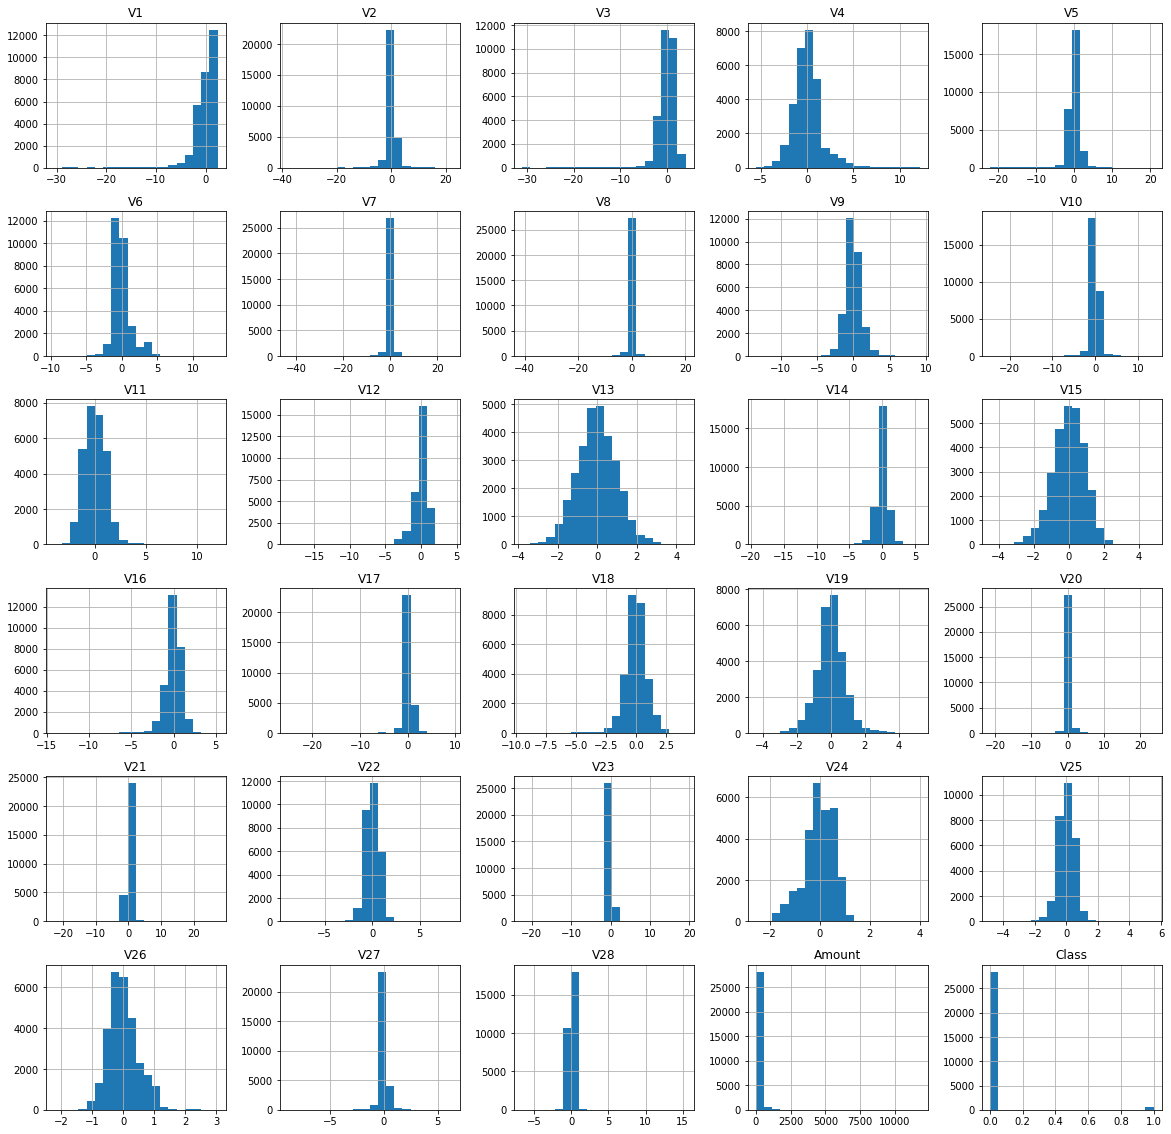

In [7]:
data.hist(figsize=(20, 20),bins=20);

Заметим, что уже по гистограммам видно наличие редких выбросов, например значительные отрицательные значения видны для V1, v2,v3,v5, а для V6,V7 значительные положительные значения. 

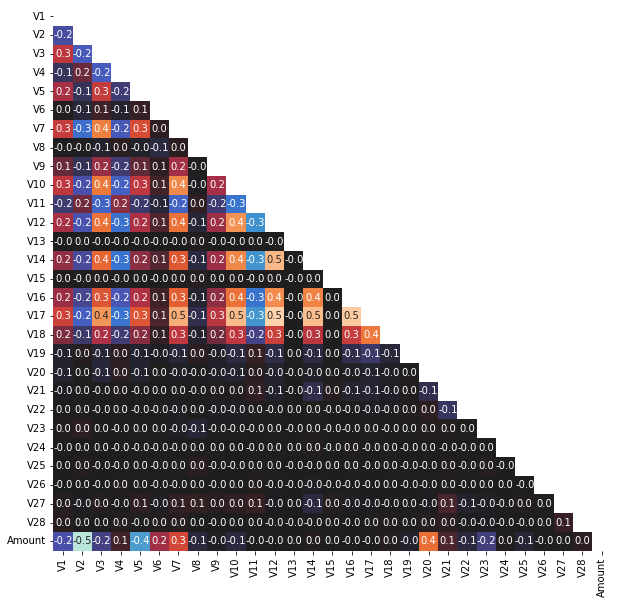

In [8]:
plt.figure(figsize=(10,10))

corr_matrix = data.iloc[:,:-1].corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.1f', cbar=False, center=0);

# 1.2 Посчитаем загрязненность данных

In [9]:
percentage_of_outliers = 100*(data['Class']==1).sum()/len(data.index)
print(f"percentage of outliers = {percentage_of_outliers:.3f}%")

percentage of outliers = 1.701%


Далее для каждого метода надо посмотреть: 
- метод (обучить) (если модель, то разбить данные)
- оценки качества бинарной классификации =  построить classification report и confusion matrix
- При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек

# 2. Выбросы и $3\sigma$-ы

## 2.1 Определение аномалий методом  $3\sigma$

In [10]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [11]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, anomalies.sum(), 100*anomalies.sum()/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))  

In [12]:
data_features = data.iloc[:, :-1]

In [13]:
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Total number of outliers: 3195
Percentage of outliers:   11.05%


In [14]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V27,1.271614,-1.265130,549.0,1.898012
V6,4.016384,-4.032308,516.0,1.783924
V10,4.166709,-4.350077,494.0,1.707865
V2,5.254727,-5.127908,490.0,1.694036
V20,2.353471,-2.344344,487.0,1.683665
V14,4.032139,-4.243323,426.0,1.472774
V8,4.434465,-4.425505,419.0,1.448574
Amount,870.827118,-690.820609,389.0,1.344857
V1,6.375961,-6.515782,386.0,1.334486
V28,0.939384,-0.943657,384.0,1.327571


## 2.2 Табличное сравнение (classification report, confusion matrix)

In [15]:
classification_reports = []
confusion_matrices = []
method_names = []

In [16]:
cl_rep = classification_report(data['Class'], std_outliers,output_dict = True)
classification_reports.append(cl_rep)
print(classification_report(data['Class'], std_outliers))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28433
           1       0.14      0.88      0.23       492

    accuracy                           0.90     28925
   macro avg       0.57      0.89      0.59     28925
weighted avg       0.98      0.90      0.94     28925



In [17]:
def calculate_and_draw_confusion_matrix(y_test,pred,method ):        
    cm = confusion_matrix(y_test, pred)    
    sns.heatmap(cm, annot=True);
    plt.title(f'Confusion matrix of the classifier {method}')        
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    return cm 

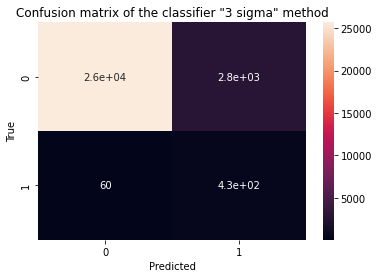

In [18]:
method = '"3 sigma" method'
cm = calculate_and_draw_confusion_matrix(data['Class'], std_outliers,method)
confusion_matrices.append(cm)
method_names.append(method)

# 2.3 UMAP

In [19]:
# X = data.iloc[:,:-1].reset_index(drop=True).copy()
# data_umap = umap.UMAP().fit_transform(X)

In [20]:
filename  = 'data-an/data_umap.pkl'
with open(filename,'rb') as inp:
    data_umap = pickle.load(inp)
# import pickle
# filename  = 'data-an/data_umap.pkl'
# with open(filename,'wb') as outp:
#     pickle.dump(data_umap, outp, pickle.HIGHEST_PROTOCOL)

In [21]:
# import pickle
# filename  = 'data-an/data_map.pkl'
# with open(filename,'wb') as outp:
#     pickle.dump(data_umap, outp, pickle.HIGHEST_PROTOCOL)

In [22]:
def plot_labeled_data(X,labels,method_name):
    if type(X)==pd.core.frame.DataFrame:
        X = X.to_numpy()
    plt.scatter(X[:,0], X[:,1],c=labels, s=20)#, cmap='coolwarm')
    plt.title(f'UMAP with {labels.sum()} outliers from {method_name} (Percentage {100*labels.sum()/len(labels):.2f}%)')
    plt.show()

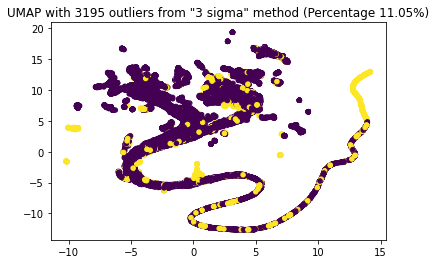

In [23]:
plot_labeled_data(data_umap, std_outliers,'"3 sigma" method')

Результат удовлетворительный. Значительная часть отмеченных точек лежат достаточно далеко от основной группой точек, но есть и часть точек пересекающиеся с основной группой точек. 

# 3. Выбросы и IQR(interquartile range)

## 3.1 Определение аномалий методом  `IQR`

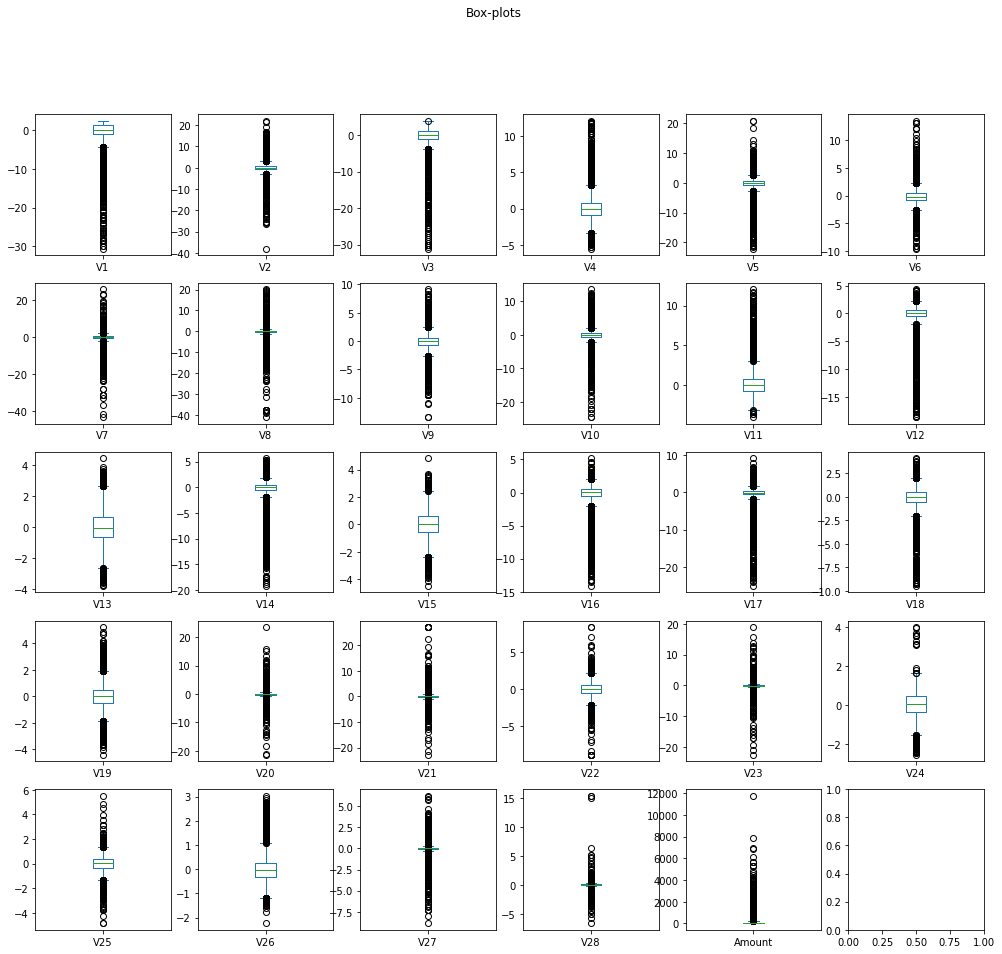

In [24]:
fig, axes = plt.subplots(5, 6, figsize=(17, 15))
fig.suptitle('Box-plots')

for ind, feature in enumerate(data_features):    
    data_features[feature].plot.box(ax=axes[int((ind/6)), ind%6])       

In [25]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [26]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr, threshold=1.5)
anomalies_report(iqr_outliers)

Total number of outliers: 13942
Percentage of outliers:   48.20%


In [27]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V27,0.341476,-0.317709,4171.0,14.420052
V28,0.278373,-0.253465,3269.0,11.301642
Amount,186.885000,-103.475000,3215.0,11.114952
V20,0.662499,-0.740015,2906.0,10.046672
V8,1.171635,-1.037760,2482.0,8.580812
V6,2.195283,-2.566794,2388.0,8.255834
V23,0.617660,-0.636089,2004.0,6.928263
V12,2.170473,-1.995943,1858.0,6.423509
V14,1.896414,-1.859597,1677.0,5.797753
V21,0.821057,-0.856501,1631.0,5.638721


## 3.2 Табличное сравнение (classification report, confusion matrix)

In [28]:
cl_rep = classification_report(data['Class'], iqr_outliers,output_dict = True)
classification_reports.append(cl_rep)
print(classification_report(data['Class'], iqr_outliers))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     28433
           1       0.03      0.97      0.07       492

    accuracy                           0.53     28925
   macro avg       0.52      0.75      0.38     28925
weighted avg       0.98      0.53      0.68     28925



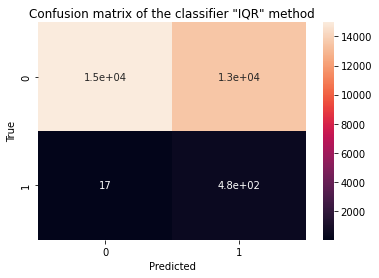

In [29]:
method = '"IQR" method'
cm = calculate_and_draw_confusion_matrix(data['Class'], iqr_outliers,method)
confusion_matrices.append(cm)
method_names.append(method)

# 3.3 UMAP

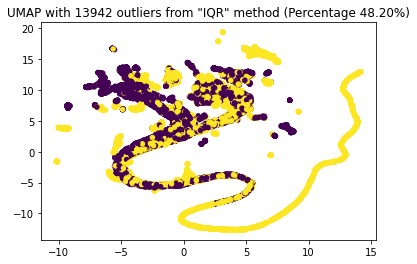

In [30]:
plot_labeled_data(data_umap, iqr_outliers, method)

Результат удовлетворительный. Часть отмеченных точек лежат достаточно далеко от основной группой точек, но есть и значительная часть точек пересекающиеся с основной группой точек. 

# 4. Кластеризация основанная на расстоянии (Distance-based)

## 4.1 Определение аномалий по расстоянию

In [31]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    # def __init__(self, metric='euclidean', percentile=99.828):
    def __init__(self, metric='euclidean', percentile=98.299):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [32]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
    )

In [33]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=98.299)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 492
Percentage of outliers:   1.70%


## 4.2 Табличное сравнение (classification report, confusion matrix)

In [34]:
cl_rep = classification_report(data['Class'], euclidian_outliers,output_dict = True)
classification_reports.append(cl_rep)
print(classification_report(data['Class'], euclidian_outliers))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28433
           1       0.35      0.35      0.35       492

    accuracy                           0.98     28925
   macro avg       0.67      0.67      0.67     28925
weighted avg       0.98      0.98      0.98     28925



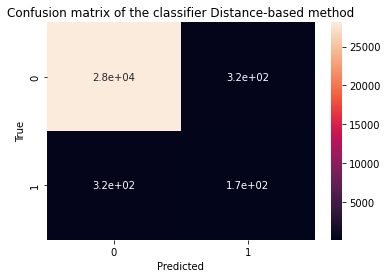

In [35]:
method = 'Distance-based method'
cm = calculate_and_draw_confusion_matrix(data['Class'], euclidian_outliers,method)
confusion_matrices.append(cm)
method_names.append(method)

## 4.3 UMAP

In [36]:
# scaled_data_umap = umap.UMAP().fit_transform(scaled_data)

In [37]:
filename  = 'data-an/scaled_data_umap.pkl'
with open(filename,'rb') as inp:
    scaled_data_umap = pickle.load(inp)
# import pickle
# filename  = 'data-an/scaled_data_umap.pkl'
# with open(filename,'wb') as outp:
#     pickle.dump(scaled_data_umap, outp, pickle.HIGHEST_PROTOCOL)

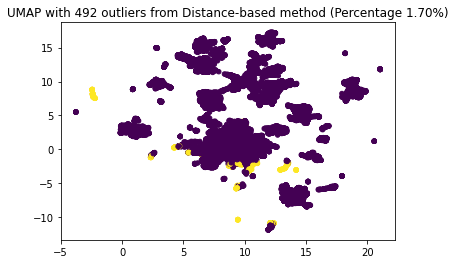

In [38]:
plot_labeled_data(scaled_data_umap, euclidian_outliers,method)

Результат не удовлетворительный. Некоторая часть аномалий лежат достаточно далеко от основной группой точек, но есть и точки пересекающиеся с основной группой точек. И есть много отдельных вершин, которые не отмечены как отдельные.

# 5. Кластеризация основанная на плотности (Density-based)

## 5.1 Определение аномалий Density-based методом

In [39]:

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.701
num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.01
eps_history = [eps]
n_jobs=-1
while outlier_percentage>1.5:
    model = DBSCAN(eps=eps, min_samples=5, algorithm='brute',n_jobs=n_jobs).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    outlier_labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = 100*sum(outlier_labels==1) / len(labels)
    if eps <1:
        eps +=0.1
    else:     
        eps += 1.
    eps_history.append(eps)    
    anomaly_percentage.append(outlier_percentage)  


In [40]:
model = DBSCAN(8.5, min_samples=5, algorithm='brute', n_jobs=n_jobs).fit(scaled_data)
# model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [41]:
anomalies_report(density_outlier)

Total number of outliers: 336
Percentage of outliers:   1.16%


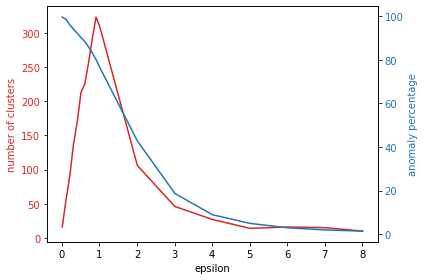

In [42]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

График показывает, Как меняется число аномалий, то есть % операция определяемых как мошеннический данным методом, и как меняется общее число кластеров. При малом $\epsilon$ все кластеры отделены друг от друга и фактически у нас 1 кластер с обозначением `-1`. C ростом $\epsilon$ появляются первые кластеры с плотностью `min_samples`. После некоторого пика, разного числа кластеров, будет спад числа кластеров, пока все они не окажутся в одном кластере при достаточно большом $\epsilon$.

## 5.2 Табличное сравнение (classification report, confusion matrix)

In [43]:
cl_rep = classification_report(data['Class'], density_outlier,output_dict = True)
classification_reports.append(cl_rep)
print(classification_report(data['Class'], density_outlier ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28433
           1       0.21      0.15      0.17       492

    accuracy                           0.98     28925
   macro avg       0.60      0.57      0.58     28925
weighted avg       0.97      0.98      0.97     28925



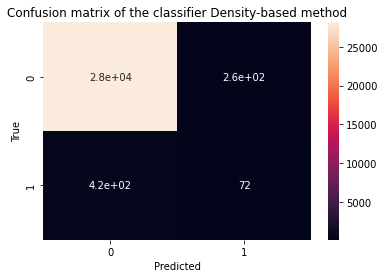

In [44]:
method = 'Density-based method'
cm = calculate_and_draw_confusion_matrix(data['Class'], density_outlier,method)
confusion_matrices.append(cm)
method_names.append(method)

## 5.3 UMAP

In [45]:
print(type(scaled_data)==pd.core.frame.DataFrame)

True


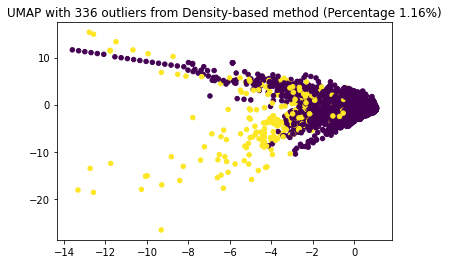

In [46]:
plot_labeled_data(scaled_data.to_numpy(), density_outlier, method)

 Результат удовлетворительный. Некоторая часть аномалий лежат достаточно далеко от основной группой точек, но есть и точки пересекающиеся с основной группой точек. Однако результат хуже лучше, чем в пункте 7.3.

# 6. Обучение без учителя метод OneClassSVM 

## 6.1 Определение аномалий методом OneClassSVM 

In [47]:
one_class_svm = OneClassSVM(nu=0.01701, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [48]:
anomalies_report(svm_outliers)

Total number of outliers: 749
Percentage of outliers:   2.59%


## 6.2 Табличное сравнение (classification report, confusion matrix)

In [49]:
cl_rep = classification_report(data['Class'], svm_outliers,output_dict = True)
classification_reports.append(cl_rep)
print(classification_report(data['Class'], svm_outliers))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     28433
           1       0.19      0.28      0.23       492

    accuracy                           0.97     28925
   macro avg       0.59      0.63      0.60     28925
weighted avg       0.97      0.97      0.97     28925



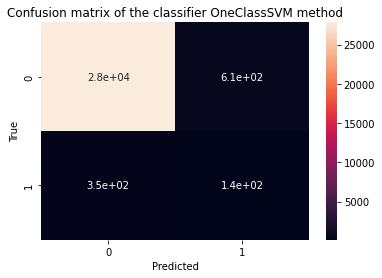

In [50]:
method = 'OneClassSVM method'
cm = calculate_and_draw_confusion_matrix(data['Class'], svm_outliers,method)
confusion_matrices.append(cm)
method_names.append(method)

## 6.3 UMAP

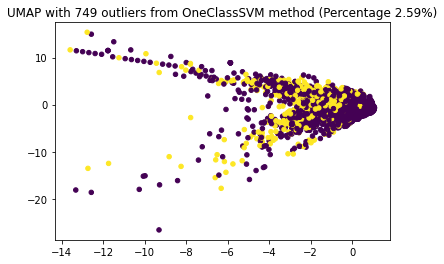

In [51]:
plot_labeled_data(scaled_data, svm_outliers, method)

Результат не удовлетворительный. Большая часть аномалий лежат в пересечении с основной группой точек.

# 7 Поиск удаленных вершин методом Isolation Forest

## 7.1 Определение аномалий методом Isolation Forest

In [52]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.017, 
                                   max_features=1.0, bootstrap=True, n_jobs=n_jobs) #, behaviour="new")
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

g:\2022\git_folder\ml_pro\training-ML-projects\mynetscrap\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [53]:
anomalies_report(isolation_outliers)

Total number of outliers: 492
Percentage of outliers:   1.70%


## 7.2 Табличное сравнение (classification report, confusion matrix)

In [54]:
cl_rep = classification_report(data['Class'], isolation_outliers, output_dict = True)
classification_reports.append(cl_rep)
print(classification_report(data['Class'], isolation_outliers))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28433
           1       0.59      0.59      0.59       492

    accuracy                           0.99     28925
   macro avg       0.79      0.79      0.79     28925
weighted avg       0.99      0.99      0.99     28925



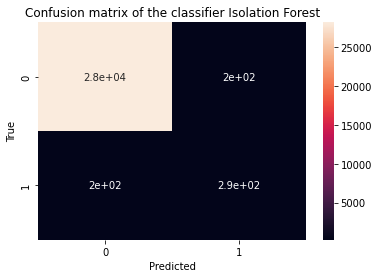

In [55]:
method = 'Isolation Forest'
cm = calculate_and_draw_confusion_matrix(data['Class'], isolation_outliers,method)
confusion_matrices.append(cm)
method_names.append(method)

## 7.3 UMAP

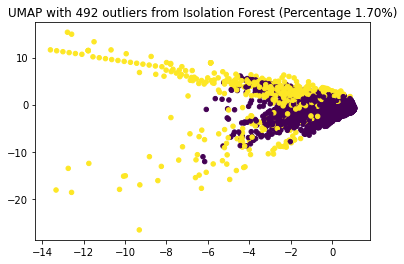

In [56]:
plot_labeled_data(scaled_data, isolation_outliers, method)

Средний результат. Некоторая часть аномалий лежат достаточно далеко от основной группой точек, но есть и точки пересекающиеся с основной группой точек. Результат лучше чем в пункте 5.3.

# 8. Сравнение
Выдаем сводную таблицу сравнение методов.
 

Так как ключевым является выявления мошеннических операций `fraud`, то самой важной для нас будет характеристика `Recall`. Так как нам важно свести к минимуму `False Negative` (ложно отрицательный) результат, когда мошенник не детектируется системой. А `False Positive` (ложно положительная) оценка для банка менее значима, чем не выявления мошенника.
Будем выдавать для "1",то есть мошенник, характеристики `Recall` и `f1-score` (средневзвешенный результат).

In [57]:
print("\tMethod    \t  |\tRecall\t       |\tf1-score")
print(65*"-")
for ind, method in enumerate(method_names):
    print(f" {method:24} |\t {classification_reports[ind]['1']['recall']:.3f} \
        |\t {classification_reports[ind]['1']['f1-score']:.3f}")

	Method    	  |	Recall	       |	f1-score
-----------------------------------------------------------------
 "3 sigma" method         |	 0.878         |	 0.234
 "IQR" method             |	 0.965         |	 0.066
 Distance-based method    |	 0.348         |	 0.348
 Density-based method     |	 0.146         |	 0.174
 OneClassSVM method       |	 0.285         |	 0.226
 Isolation Forest         |	 0.589         |	 0.589


Методы: "3-ех сигм", "Интерквартильного размаха", "Исключающего леса", показали наилучшие результаты, но не один не может быть применен в чистом виде, так как cлишком низкая метрика f1-score, говорит о том, что велико число нормальных транзакций помеченных как мошеннические (ложно положительное срабатывание), что также влечет за собой издержки для банка.  